# Исследование надежности заемщиков


Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Библиотеки

In [1]:
import os

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PATH = 'C:/Users/igors/OneDrive/Рабочий стол/Портфолио/1. Исследование надёжности заемщиков/data.csv'

## Изучение общей информации о данных

Считаем данные из csv-файла в датафрейм. Выведем первые 20 строк датафрейма.

In [2]:
if os.path.exists(PATH):
    try:
        data = pd.read_csv(PATH)
    except:
        print('Ошибка в считывании данных.')
else:
    print(f'Путь {PATH} не сущесвтует.')


display(data.head(20))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


Выведем основную информацию о датафрейме.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Описание данных: 

- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита

## Предобработка данных

### Удаление пропусков

Выведем количество пропущенных значений для каждого столбца.

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения, `total_income` и `days_employed`. Столбцом `days_employed` займёмся после обработки аномалий. `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполним пропуски в этом столбце медианным значением по каждому типу из столбца `income_type`. 

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

Отрицательное количество дней трудового стажа в столбце `days_employed` является аномальным. Заменим все отрицательные значения положительными с помощью метода.

In [6]:
data['days_employed'] = data['days_employed'].abs()

Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях.

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Оставим их как есть, т.к. этот столбец не понадобится для исследования.

Выведем перечень уникальных значений столбца `children`.

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

В столбце `children` есть два аномальных значения. Удалим строки, в которых встречаются такие аномальные значения из датафрейма `data`.

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

Убедимся, что артефакты удалены.

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

Заполним пропуски в столбце `days_employed` медианными значениями по каждому типу занятости `income_type`.

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

Убедимся, что все пропуски заполнены. 

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

Заменим вещественный тип данных в столбце `total_income` на целочисленный.

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

Обработаем неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру.

In [14]:
data['education'] = data['education'].str.lower()

Выведем на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалим их.

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

На основании диапазонов, указанных ниже, создадим в датафрейме `data` столбец `total_income_category` с категориями:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

Определим для этого новую функцию.

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

Выведем на экран перечень уникальных целей взятия кредита из столбца `purpose`.

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Создадим функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

Определим для этого новую функцию.

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Исследование данныx

Исследуем данные и попробуем ответить на четыре вопроса:
 - есть ли зависимость между количеством детей и возвратом кредита в срок?
 - есть ли зависимость между семейным положением и возвратом кредита в срок?
 - есть ли зависимость между уровнем дохода и возвратом кредита в срок?
 - как разные цели кредита влияют на его возврат в срок?

Определим функции для подсчетов и визуализации.

In [22]:
#функция для подсчёта клиентов по категориям из выбранного столбца
def calculate_amount_of_clients_by_categories(data_frame, column_name):
    
    data = data_frame[[column_name, 'debt']].sort_values(column_name)
    
    categories = data[column_name].unique()
    amount_of_clients_by_categories = []
    
    for category in categories:
        amount_of_clients_by_categories.append(len(data.loc[data[column_name] == category]))
    return pd.DataFrame({'category': categories, 'amount_of_clients':amount_of_clients_by_categories})

#функция для отображения информаци о количестве клиентов по категориям в табличном виде и в виде столбчатой диаграммы
def view_clients_amount_by_categories(info, title='', xlabel='', ylabel='', figsize=None):
    print('Табличное представление:')
    display(info)
    print('Графическое представление:')
    fig = plt.figure(figsize=figsize)
    plt.bar(info['category'], info['amount_of_clients'])
     
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return

#функция для подсчёта долей добросовестных клиентов и клиентов с задолженностью по категориям из выбранного столбца
def calculate_share_of_debtors_by_category(data_frame, column_name):    
    data = data_frame[[column_name, 'debt']].sort_values(column_name)    
    categories = data[column_name].unique()
    debtor_shares_number = []
    not_debtor_shares_number = []

    for category in categories:
        clients_count = len(data.loc[(data[column_name] == category)])
        debtors_count = len(data.loc[(data[column_name] == category) & (data['debt'] == 1)])
        debtors_share = debtors_count/clients_count
        debtor_shares_number.append(debtors_share)
        not_debtor_shares_number.append(1 - debtors_share)
    return pd.DataFrame({'category': categories, 'not_debtor': not_debtor_shares_number, 'debtor': debtor_shares_number})

#функция для отображения информации о долях добросовестных клиентов и клиентов с задолженностью по категориям в виде хитмэпа
def view_heatmap_debtors_shares_by_categories(info, title='', xlabel='', ylabel='', yticklabels='auto', sorting=False):
    if sorting:
        info = info.sort_values('debtor')
        yticklabels = info['category']
    ax = sns.heatmap(info[['not_debtor', 'debtor']], annot=True, fmt='.2%', cmap='RdYlGn', cbar=False, yticklabels=yticklabels)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return

#функция для отображения информации о долях клиентов с задолженностью по категориям в виде стобчатой диаграммы
def view_barplot_debtors_shares_by_categories(info, title='', xlabel='', ylabel='', figsize=None, sorting=False):
    if sorting:
        info = info.sort_values('debtor')
    fig = plt.figure(figsize=figsize)
    plt.bar(info['category'], list(map(lambda x: x*100, info['debtor'])), color='DarkRed')
 
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return
    
    

### Поиск зависимости между количеством детей и возвратом кредита в срок

Просмотрим количество клиентов банка для каждого количества детей. Визуализируем данные для наглядности

Табличное представление:


,category,amount_of_clients
0,0,14091
1,1,4808
2,2,2052
3,3,330
4,4,41
5,5,9


Графическое представление:


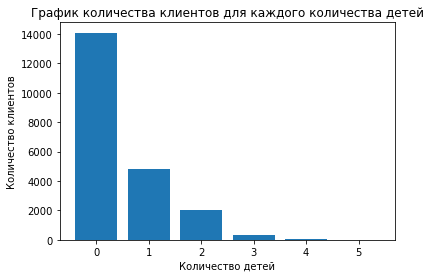

In [23]:
info_about_amount_of_clients = calculate_amount_of_clients_by_categories(data, 'children')
view_clients_amount_by_categories(info_about_amount_of_clients, title='График количества клиентов для каждого количества детей', xlabel='Количество детей', ylabel='Количество клиентов')

Рассчиатем доли должников по каждому количеству детей и визуализируем полученные данные.

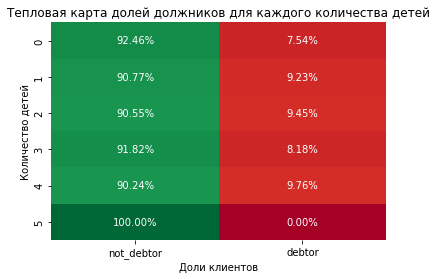

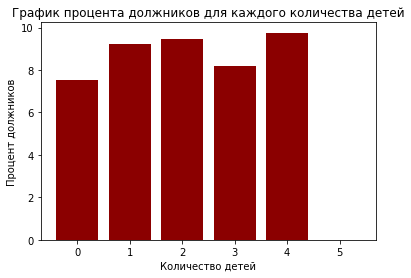

In [24]:
info_about_debtors = calculate_share_of_debtors_by_category(data, 'children')
view_heatmap_debtors_shares_by_categories(info_about_debtors, title='Тепловая карта долей должников для каждого количества детей', xlabel='Доли клиентов', ylabel='Количество детей')
view_barplot_debtors_shares_by_categories(info_about_debtors, title='График процента должников для каждого количества детей',xlabel='Количество детей', ylabel='Процент должников')

**Вывод:**

Клиентов с четырьмя и пятью детьми сравнительно мало. Выводы на основании таких выборок могут быть неточны, поэтому принимать решения, основываясь на этих данных ненадёжно. Настоятельно рекомендуется отказаться от рассмотрения категории клиентов с пятью детьми.

Если не принимать во внимание категорию клиентов с четырьмя детьми, то прямой зависимости добросовестности клиента от количества детей не наблюдается, так как с увеличением количества детей от нуля до двух количество должников растёт, но при этом падает для клиентов с тремя детьми.

Если принять во внимание категорию клиентов с четырьмя детьми, то при выборе трёх соседних категорий (0-2 ребёнка, 1-3 ребёнка и 2-4 ребёнка) средняя доля должников всё же будет расти с увеличением количества детей.


### Поиск зависимости между семейным положением и возвратом кредита в срок

**Просмотрим количество клиентов банка для каждого семейного положения. Визуализируем данные для наглядности**

Табличное представление:


,category,amount_of_clients
0,Не женат / не замужем,2796
1,в разводе,1189
2,вдовец / вдова,951
3,гражданский брак,4134
4,женат / замужем,12261


Графическое представление:


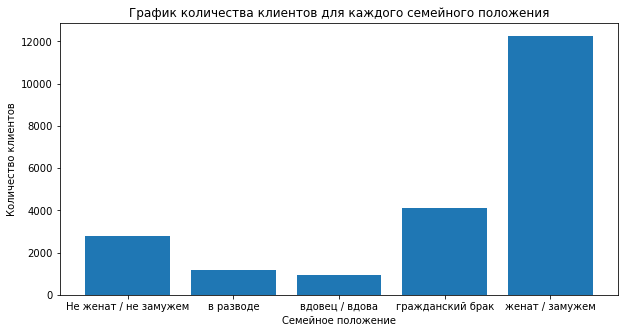

In [25]:
info_about_amount_of_clients = calculate_amount_of_clients_by_categories(data, 'family_status')
view_clients_amount_by_categories(info_about_amount_of_clients, title='График количества клиентов для каждого семейного положения', xlabel='Семейное положение', ylabel='Количество клиентов', figsize=[10, 5])

Рассчиатем доли должников по каждому семейному положению и визуализируем полученные данные

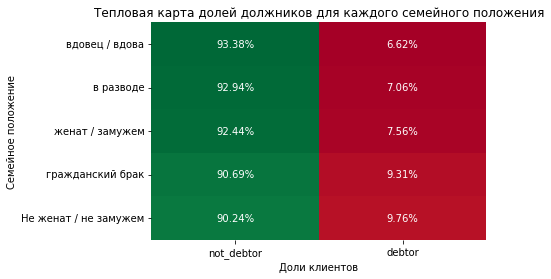

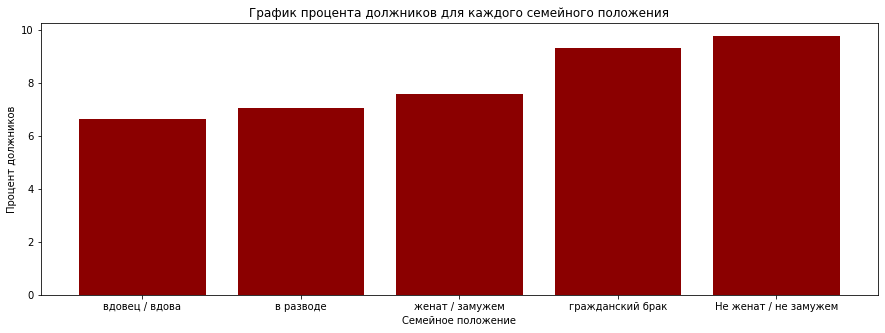

In [26]:
info_about_debtors = calculate_share_of_debtors_by_category(data, 'family_status')
view_heatmap_debtors_shares_by_categories(info_about_debtors, title='Тепловая карта долей должников для каждого семейного положения', xlabel='Доли клиентов', ylabel='Семейное положение', yticklabels=info_about_debtors['category'], sorting=True)
view_barplot_debtors_shares_by_categories(info_about_debtors, title='График процента должников для каждого семейного положения', xlabel='Семейное положение', ylabel='Процент должников', figsize=[15, 5], sorting=True)

**Вывод:** 

В результате исследования было выяснено, что самыми добросовестными клиентами являются вдовцы и вдовы, а самыми недобросовестными - неженатые люди. Так, последние становятся должниками в 1.5 раза чаще, чем первые. 

Построенные графики процентных долей должников для каждой категории семейного положения позволят ранжировать данные категории по надёжности для одобрения кредитов.

### Поиск зависимости между уровнем дохода и возвратом кредита в срок

Просмотрим количество клиентов банка для каждой категории уровня дохода. Визуализируем данные для наглядности.

Табличное представление:


,category,amount_of_clients
0,A,25
1,B,5014
2,C,15921
3,D,349
4,E,22


Графическое представление:


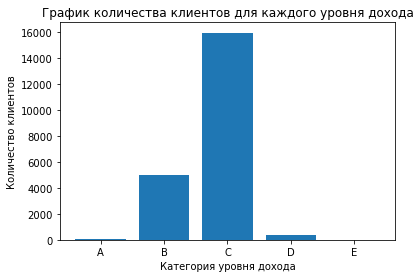

In [27]:
info_about_amount_of_clients = calculate_amount_of_clients_by_categories(data, 'total_income_category')
view_clients_amount_by_categories(info_about_amount_of_clients, title='График количества клиентов для каждого уровня дохода', xlabel='Категория уровня дохода', ylabel='Количество клиентов')

Рассчиатем доли должников по каждой категории уровня дохода и визуализируем полученные данные.

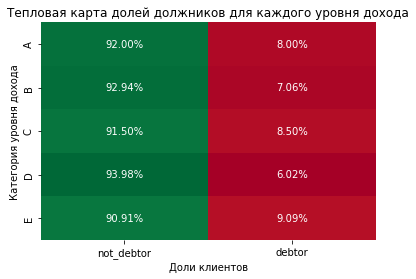

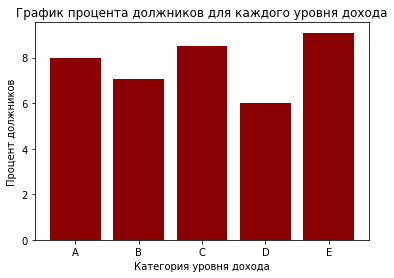

In [28]:
info_about_debtors = calculate_share_of_debtors_by_category(data, 'total_income_category')
view_heatmap_debtors_shares_by_categories(info_about_debtors, title='Тепловая карта долей должников для каждого уровня дохода', xlabel='Доли клиентов', ylabel='Категория уровня дохода', yticklabels=info_about_debtors['category'])
view_barplot_debtors_shares_by_categories(info_about_debtors, title='График процента должников для каждого уровня дохода', xlabel='Категория уровня дохода', ylabel='Процент должников')

**Вывод:** 


В категориях заработка А и Е достаточно мало представителей, поэтому данные, полученные для данных категорий, могут быть недостоверными.

Тем не менее построенные графики позволяют понять, что прямой зависимости между уровнем заработка клиента и его добросовестностью нет.

### Влияние цели кредита на его возврат в срок

Просмотрим количество клиентов банка для каждой категории цели кредита. Визуализируем данные для наглядности.

Табличное представление:


,category,amount_of_clients
0,операции с автомобилем,4279
1,операции с недвижимостью,10751
2,получение образования,3988
3,проведение свадьбы,2313


Графическое представление:


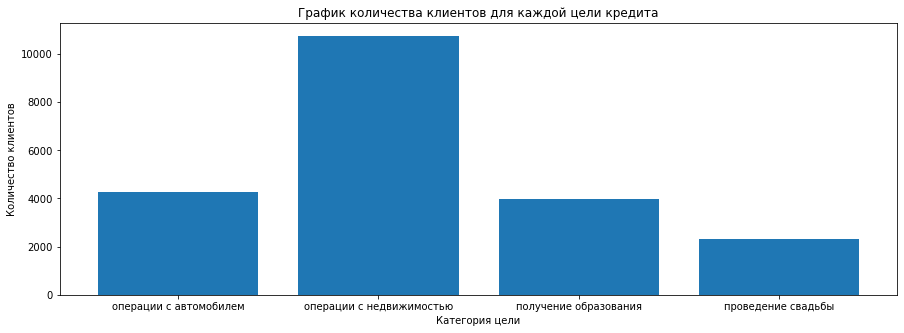

In [29]:
info_about_amount_of_clients = calculate_amount_of_clients_by_categories(data, 'purpose_category')
view_clients_amount_by_categories(info_about_amount_of_clients, title='График количества клиентов для каждой цели кредита', xlabel='Категория цели', ylabel='Количество клиентов', figsize=[15, 5])

Рассчиатем доли должников по каждой категории цели кредита и визуализируем полученные данные.

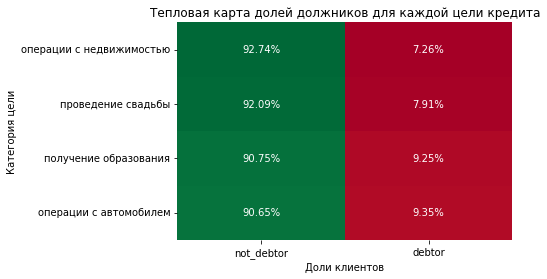

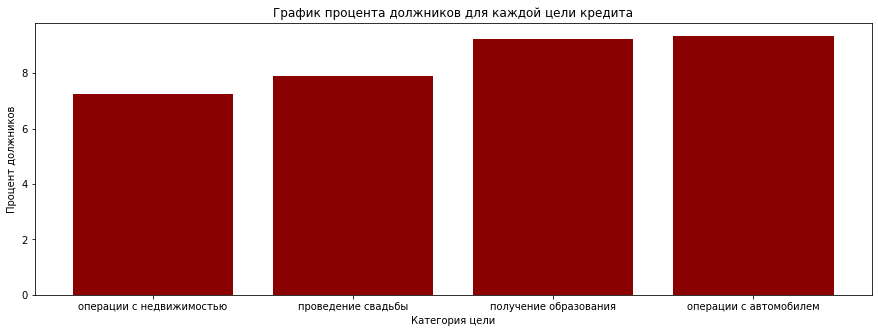

In [30]:
info_about_debtors = calculate_share_of_debtors_by_category(data, 'purpose_category')
view_heatmap_debtors_shares_by_categories(info_about_debtors, title='Тепловая карта долей должников для каждой цели кредита', xlabel='Доли клиентов', ylabel='Категория цели', yticklabels=info_about_debtors['category'], sorting=True)
view_barplot_debtors_shares_by_categories(info_about_debtors, title='График процента должников для каждой цели кредита', xlabel='Категория цели', ylabel='Процент должников', figsize=[15, 5], sorting=True)

**Вывод:** 

В результате исследования было выяснено, что самыми добросовестными являются клиенты, берущие кредит для операций с недвижимостью, а самыми недобросовестными - для операций с автомобилями. Так, последние становятся должниками на 1/6 чаще, чем первые. 

Построенные графики процентных долей должников для каждой категории цели кредита позволят ранжировать данные категории по надёжности для одобрения кредитов.

## Общий вывод.

- Если принять число клиентов с четырьмя детьми достаточным для репрезентативности данных, то можно считать, что с увеличением количества детей у клиентов вероятность того, что они станут должниками растёт. В противном случае явная звисимость вероятности становления должником от количества детей отсутствует.
- Для каждой категории семейного положения были рассчитаны доли должников. На совновании полученных данных был построен ранжированный по увеличению вероятности становления должником список категорий семейного положения:
    - вдовцы/вдовы, в разводе, женат/замужем, в гражданском браке, не женат/не замужем.
- Зависимости вероятности становления должником от уровня дохода нет.
- Для каждой категории цели кредита были рассчитаны доли должников. На совновании полученных данных был построен ранжированный по увеличению вероятности становления должником список категорий целей кредита:
    - операции с недвижимостью, проведение свадьбы, получение образования, операции с автомобилем.